In [1]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)

# Here are my rc parameters for matplotlib
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': 12})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 1000
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 0.5
mpl.rcParams['axes.linewidth'] = 1.5

In [2]:
# Get the current path
if first:
    parent = os.getcwd()
os.chdir(parent)

# Grab file names from data folder
data = os.listdir('all_area_txts')
try:
    data.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
print(data)

['area_pa150_pb500_xa60_ep82.txt', 'area_pa400_pb500_xa50_ep82.txt', 'area_pa375_pb500_xa20_ep82.txt', 'area_pa130_pb185_xa30_ep31.txt', 'area_pa110_pb157_xa30_ep27.txt', 'area_pa0_pb500_xa40_ep82.txt', 'area_pa60_pb120_xa30_ep21.txt', 'area_pa80_pb114_xa30_ep20.txt', 'area_pa70_pb233_xa30_ep39.txt', 'area_pa10_pb33_xa50_ep7.txt', 'area_pa80_pb266_xa30_ep44.txt', 'area_pa150_pb214_xa70_ep36.txt', 'area_pa450_pb500_xa50_ep82.txt', 'area_pa125_pb500_xa40_ep82.txt', 'area_pa100_pb500_xa60_ep82.txt', 'area_pa50_pb500_xa20_ep82.txt', 'area_pa90_pb128_xa70_ep22.txt', 'area_pa140_pb280_xa70_ep46.txt', 'area_pa10_pb11_xa50_ep3.txt', 'area_pa120_pb171_xa70_ep29.txt', 'area_pa40_pb80_xa70_ep14.txt', 'area_pa0_pb500_xa90_ep82.txt', 'area_pa200_pb500_xa20_ep82.txt', 'area_pa70_pb100_xa30_ep18.txt', 'area_pa50_pb166_xa70_ep28.txt', 'area_pa50_pb100_xa70_ep18.txt', 'area_pa125_pb500_xa90_ep82.txt', 'area_pa80_pb160_xa50_ep27.txt', 'area_pa130_pb260_xa30_ep43.txt', 'area_pa500_pb500_xa70_ep82.txt', '

In [3]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, ref):
    boolean = False
    for i in xrange(len(fname)):
        if fname[i] == ref[0]:
            for j in xrange(1, len(ref)):
                if fname[i + j] == ref[j]:
                    boolean = True
                    break
    return boolean

def txtValue(fname, string):
    out = ""
    index = 0
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
            for j in xrange(1, len(string)):
                if fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        index = i + j
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]      
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [4]:
# Grab parameters, sort them
def computePeNet(PeS, PeF, xF):
    # Make sure particle fraction is in appropriate range
    if xF > 1.:
        xF /= 100.
    # Make sure slow species is actually slower
    if PeS > PeF:
        PeS, PeF = PeF, PeS
        xF = 1. - xF
    peNet = ((1. - xF) * PeS) + (xF * PeF)
    peRNet = (((1. - xF)*(np.sqrt(PeS/PeF))) + xF) * peNet
    return peNet, peRNet

peList = []
paList = []
pbList = []
xaList = []
epList = []
phiList = []
peNetList = []
peRNetList = []
for i in xrange(len(data)):
    if checkFile(data[i], "pe"):
        peList.append(txtValue(data[i], "pe"))
    else:
        peList.append(0)
    
    if checkFile(data[i], "pa"):
        paList.append(txtValue(data[i], "pa"))
    else:
        paList.append(0)
        
    if checkFile(data[i], "pb"):
        pbList.append(txtValue(data[i], "pb"))
    else:
        pbList.append(0)
        
    if checkFile(data[i], "xa"):
        xaList.append(txtValue(data[i], "xa"))
    else:
        xaList.append(100.)
        
    if checkFile(data[i], "ep"):
        epList.append(txtValue(data[i], "ep"))
    else:
        epList.append(1.)
        
    if checkFile(data[i], "phi"):
        phiList.append(txtValue(data[i], "phi"))
    else:
        phiList.append(60.)
    
    peNet, peRNet = computePeNet(paList[-1], pbList[-1], 100. - xaList[-1])
    peNetList.append(peNet)
    peRNetList.append(peRNet)

# Take a look at your lists
# print(peList)
# print(paList) 
# print(pbList) 
# print(xaList) 
# print(epList) 
# print(phiList)        

# Sort the arrays
if len(paList) > 1:
    # Sort them!
    print("Sorting... ")
    indArr = multiSort(peNetList, paList, pbList)
    indSort(data, indArr)
    indSort(peList, indArr)
    indSort(paList, indArr)
    indSort(pbList, indArr)
    indSort(xaList, indArr)
    indSort(epList, indArr)
    indSort(phiList, indArr)
    indSort(peNetList, indArr)
    indSort(peRNetList, indArr)

# Print the sorted array
print("Sorted textfiles:")
for i in data:
    print(i)
    
# Now that the data is sorted, read it into a dataframe
all_data = []
os.chdir('all_area_txts')
for i in xrange(len(data)):
    df = pd.read_csv(data[i], sep='\s+', header=0)
    all_data.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_data[0])
# print(all_data[0]['Timestep'])
# print(all_data[0]['Timestep'][0])

Sorting... 
Sorted textfiles:
area_pa10_pb11_xa50_ep3.txt
area_pa10_pb14_xa70_ep4.txt
area_pa10_pb14_xa50_ep4.txt
area_pa10_pb14_xa30_ep4.txt
area_pa10_pb20_xa70_ep5.txt
area_pa10_pb20_xa50_ep5.txt
area_pa10_pb33_xa70_ep7.txt
area_pa10_pb20_xa30_ep5.txt
area_pa20_pb22_xa50_ep5.txt
area_pa10_pb33_xa50_ep7.txt
area_pa20_pb28_xa70_ep6.txt
area_pa20_pb28_xa50_ep6.txt
area_pa20_pb28_xa30_ep6.txt
area_pa20_pb40_xa70_ep8.txt
area_pa10_pb33_xa30_ep7.txt
area_pa20_pb40_xa50_ep8.txt
area_pa30_pb33_xa50_ep7.txt
area_pa30_pb42_xa70_ep8.txt
area_pa20_pb66_xa70_ep12.txt
area_pa20_pb40_xa30_ep8.txt
area_pa30_pb42_xa50_ep8.txt
area_pa30_pb42_xa30_ep8.txt
area_pa30_pb60_xa70_ep11.txt
area_pa40_pb44_xa50_ep9.txt
area_pa20_pb66_xa50_ep12.txt
area_pa30_pb60_xa50_ep11.txt
area_pa40_pb57_xa70_ep11.txt
area_pa40_pb57_xa50_ep11.txt
area_pa0_pb500_xa90_ep82.txt
area_pa50_pb500_xa100_ep82.txt
area_pa30_pb60_xa30_ep11.txt
area_pa30_pb100_xa70_ep18.txt
area_pa40_pb57_xa30_ep11.txt
area_pa40_pb80_xa70_ep14.txt
are

Timestep  Gas_A  Gas_B  Gas_tot  Dense_A  Dense_B  Dense_tot  Lc_numA  \
0          0.0  25000  25000    50000        0        0          0        3   
1     150000.0  25000  25000    50000        0        0          0        9   
2     300000.0  25000  25000    50000        0        0          0       13   
3     450000.0  25000  25000    50000        0        0          0        8   
4     600000.0  25000  25000    50000        0        0          0       17   
..         ...    ...    ...      ...      ...      ...        ...      ...   
95  14250000.0  25000  25000    50000        0        0          0       14   
96  14400000.0  25000  25000    50000        0        0          0       11   
97  14550000.0  25000  25000    50000        0        0          0       14   
98  14700000.0  25000  25000    50000        0        0          0       16   
99  14850000.0  25000  25000    50000        0        0          0       16   

    Lc_numB  Lg_clust  MCS  sigALL   sigAA   sigAB   sigBB  phiEff  Lc_area_A  \
0         8        11    0  1.0024  1.0038  1.0024  1.0184     0.6     2.3008   
1        17        26    0  1.0068  1.0365  1.0026  1.0068     0.6     6.8646   
2        14        27    0  1.0006  0.9987  1.0111  1.0266     0.6     9.8888   
3        14        22    0  1.0095  0.9987  1.0010  1.0108     0.6     6.1427   
4         9        26    0  1.0073  0.9935  1.0073  1.0053     0.6    13.0344   
..      ...       ...  ...     ...     ...     ...     ...     ...        ...   
95       13        27    0  1.0005  1.0037  1.0026  1.0100     0.6    10.7048   
96       10        21    0  1.0053  1.0038  1.0022  1.0053     0.6     8.4919   
97       12        26    0  1.0025  1.0025  1.0010  1.0060     0.6    10.7465   
98       14        30    0  0.9993  1.0161  0.9993  1.0069     0.6    12.3229   
99       12        28    0  1.0041  1.0108  1.0035  1.0069     0.6    12.4051   

    Lc_area_B  lc_area  den_area_A  den_area_B  den_area  Box_area  
0      6.1627   8.4635         0.0         0.0       0.0  65449.85  
1     13.0966  19.9613         0.0         0.0       0.0  65449.85  
2     10.7096  20.5985         0.0         0.0       0.0  65449.85  
3     10.7273  16.8700         0.0         0.0       0.0  65449.85  
4      6.8761  19.9105         0.0         0.0       0.0  65449.85  
..        ...      ...         ...         ...       ...       ...  
95     9.9581  20.6628         0.0         0.0       0.0  65449.85  
96     7.7396  16.2314         0.0         0.0       0.0  65449.85  
97     9.2961  20.0426         0.0         0.0       0.0  65449.85  
98    10.6770  22.9998         0.0         0.0       0.0  65449.85  
99     9.2952  21.7003         0.0         0.0       0.0  65449.85  

[100 rows x 23 columns]

In [5]:
# Function to get conversion from timesteps to Brownian time
def computeTauPerTstep(epsilon, mindt=0.00001):
    kBT = 1.0
    tstepPerTau = int(epsilon / (kBT * mindt))
    return 1. / tstepPerTau

# Grab the parameters from each file, store in a dataframe
headers = ['partAll', 'partA', 'partB', 'pe', 'peA', 'peB', 'xA', 'peR', 'peNet', 'peRNet', 'eps', 'phi', 'tauPer_dt']
params = pd.DataFrame(columns=headers)
for i in xrange(len(all_data)):
    partAll = all_data[i]['Gas_tot'][0] + all_data[i]['Dense_tot'][0]
    partA = all_data[i]['Gas_A'][0] + all_data[i]['Dense_A'][0]
    partB = all_data[i]['Gas_B'][0] + all_data[i]['Dense_B'][0]
    pe = int(peList[i])
    pa = int(paList[i])
    pb = int(pbList[i])
    xa = float(xaList[i])
    if xa != 0 and xa != 100:
        if pa > pb:
            peR = float(pb) / float(pa)
        else:
            peR = float(pa) / float(pb)
    else:
        peR = 1.
    peNet = float(peNetList[i])
    peRNet = float(peRNetList[i])
    ep = int(epList[i])
    phi = float(phiList[i])
    if ep == 1:
        tauPerdt = computeTauPerTstep(ep, 0.000001)
    else:
        tauPerdt = computeTauPerTstep(ep)
    df = pd.DataFrame([[partAll, partA, partB, pe, pa, pb, xa, peR, peNet, peRNet, ep, phi, tauPerdt]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

partAll  partA  partB pe  peA  peB    xA       peR  peNet      peRNet eps  \
0     50000  25000  25000  0   10   11  50.0  0.909091   10.5   10.255679   3   
1     50000  35000  15000  0   10   14  70.0  0.714286   11.2    9.986009   4   
2     50000  25000  25000  0   10   14  50.0  0.714286   12.0   11.070926   4   
3     50000  15000  35000  0   10   14  30.0  0.714286   12.8   12.205392   4   
4     50000  35000  15000  0   10   20  70.0  0.500000   13.0   10.334672   5   
..      ...    ...    ... ..  ...  ...   ...       ...    ...         ...  ..   
235  100000  30000  70000  0  450  500  30.0  0.900000  485.0  477.533420  82   
236  100000  10000  90000  0  375  500  10.0  0.750000  487.5  480.968738  82   
237  100000  90000  10000  0  500  500  90.0  1.000000  500.0  500.000000  82   
238  100000  50000  50000  0  500  500  50.0  1.000000  500.0  500.000000  82   
239  100000  70000  30000  0  500  500  70.0  1.000000  500.0  500.000000  82   

      phi     tauPer_dt  
0    60.0  3.333333e-06  
1    60.0  2.500006e-06  
2    60.0  2.500006e-06  
3    60.0  2.500006e-06  
4    60.0  2.000004e-06  
..    ...           ...  
235  60.0  1.219512e-07  
236  60.0  1.219512e-07  
237  60.0  1.219512e-07  
238  60.0  1.219512e-07  
239  60.0  1.219512e-07  

[240 rows x 13 columns]

In [6]:
# Let's add columns to the time-resolved simulation data
for i in xrange(len(all_data)):
    # Move timestep column from timesteps to rotational relaxation time
    all_data[i]['Timestep'] *= params['tauPer_dt'][i] * 3.0
    
    # New column for number of clusters
    all_data[i]['nClust'] = all_data[i]['Dense_tot'] / all_data[i]['MCS']
    
    # New column for area of gas phase
    all_data[i]['a_gas'] = all_data[i]['Box_area'] - all_data[i]['den_area']
    
    # New columns for area fractions:
    all_data[i]['phiLC_A'] = all_data[i]['Lc_area_A'] / all_data[i]['Box_area']
    all_data[i]['phiLC_B'] = all_data[i]['Lc_area_B'] / all_data[i]['Box_area']
    all_data[i]['phiLC'] = all_data[i]['lc_area'] / all_data[i]['Box_area']
    all_data[i]['phiC_A'] = all_data[i]['den_area_A'] / all_data[i]['Box_area']
    all_data[i]['phiC_B'] = all_data[i]['den_area_B'] / all_data[i]['Box_area']
    all_data[i]['phiC'] = all_data[i]['den_area'] / all_data[i]['Box_area']
    all_data[i]['phiG_A'] = (all_data[i]['Gas_A'] * np.pi * 0.25) / all_data[i]['Box_area']
    all_data[i]['phiG_B'] = (all_data[i]['Gas_B'] * np.pi * 0.25) / all_data[i]['Box_area']
    all_data[i]['phiG'] = (all_data[i]['Gas_tot'] * np.pi * 0.25) / all_data[i]['Box_area']
    
    # New columns for number densities:
    all_data[i]['rhoLC_A'] = all_data[i]['Lc_numA'] / all_data[i]['lc_area']
    all_data[i]['rhoLC_B'] = all_data[i]['Lc_numB'] / all_data[i]['lc_area']
    all_data[i]['rhoLC'] = all_data[i]['Lg_clust'] / all_data[i]['lc_area']
    all_data[i]['rhoC_A'] = all_data[i]['Dense_A'] / all_data[i]['den_area']
    all_data[i]['rhoC_B'] = all_data[i]['Dense_B'] / all_data[i]['den_area']
    all_data[i]['rhoC'] = all_data[i]['Dense_tot'] / all_data[i]['den_area']
    all_data[i]['rhoG_A'] = all_data[i]['Gas_A'] / all_data[i]['a_gas']
    all_data[i]['rhoG_B'] = all_data[i]['Gas_B'] / all_data[i]['a_gas']
    all_data[i]['rhoG'] = all_data[i]['Gas_tot'] / all_data[i]['a_gas']
    
    # Ger rid of NaN in favor of 0
    all_data[i].fillna(0, inplace=True)

# display(all_data[0][0])
display(all_data[0])

Timestep  Gas_A  Gas_B  Gas_tot  Dense_A  Dense_B  Dense_tot  Lc_numA  \
0        0.0  25000  25000    50000        0        0          0        3   
1        1.5  25000  25000    50000        0        0          0        9   
2        3.0  25000  25000    50000        0        0          0       13   
3        4.5  25000  25000    50000        0        0          0        8   
4        6.0  25000  25000    50000        0        0          0       17   
..       ...    ...    ...      ...      ...      ...        ...      ...   
95     142.5  25000  25000    50000        0        0          0       14   
96     144.0  25000  25000    50000        0        0          0       11   
97     145.5  25000  25000    50000        0        0          0       14   
98     147.0  25000  25000    50000        0        0          0       16   
99     148.5  25000  25000    50000        0        0          0       16   

    Lc_numB  Lg_clust  MCS  sigALL   sigAA   sigAB   sigBB  phiEff  Lc_area_A  \
0         8        11    0  1.0024  1.0038  1.0024  1.0184     0.6     2.3008   
1        17        26    0  1.0068  1.0365  1.0026  1.0068     0.6     6.8646   
2        14        27    0  1.0006  0.9987  1.0111  1.0266     0.6     9.8888   
3        14        22    0  1.0095  0.9987  1.0010  1.0108     0.6     6.1427   
4         9        26    0  1.0073  0.9935  1.0073  1.0053     0.6    13.0344   
..      ...       ...  ...     ...     ...     ...     ...     ...        ...   
95       13        27    0  1.0005  1.0037  1.0026  1.0100     0.6    10.7048   
96       10        21    0  1.0053  1.0038  1.0022  1.0053     0.6     8.4919   
97       12        26    0  1.0025  1.0025  1.0010  1.0060     0.6    10.7465   
98       14        30    0  0.9993  1.0161  0.9993  1.0069     0.6    12.3229   
99       12        28    0  1.0041  1.0108  1.0035  1.0069     0.6    12.4051   

    Lc_area_B  lc_area  den_area_A  den_area_B  den_area  Box_area  nClust  \
0      6.1627   8.4635         0.0         0.0       0.0  65449.85     0.0   
1     13.0966  19.9613         0.0         0.0       0.0  65449.85     0.0   
2     10.7096  20.5985         0.0         0.0       0.0  65449.85     0.0   
3     10.7273  16.8700         0.0         0.0       0.0  65449.85     0.0   
4      6.8761  19.9105         0.0         0.0       0.0  65449.85     0.0   
..        ...      ...         ...         ...       ...       ...     ...   
95     9.9581  20.6628         0.0         0.0       0.0  65449.85     0.0   
96     7.7396  16.2314         0.0         0.0       0.0  65449.85     0.0   
97     9.2961  20.0426         0.0         0.0       0.0  65449.85     0.0   
98    10.6770  22.9998         0.0         0.0       0.0  65449.85     0.0   
99     9.2952  21.7003         0.0         0.0       0.0  65449.85     0.0   

       a_gas   phiLC_A   phiLC_B     phiLC  phiC_A  phiC_B  phiC  phiG_A  \
0   65449.85  0.000035  0.000094  0.000129     0.0     0.0   0.0     0.3   
1   65449.85  0.000105  0.000200  0.000305     0.0     0.0   0.0     0.3   
2   65449.85  0.000151  0.000164  0.000315     0.0     0.0   0.0     0.3   
3   65449.85  0.000094  0.000164  0.000258     0.0     0.0   0.0     0.3   
4   65449.85  0.000199  0.000105  0.000304     0.0     0.0   0.0     0.3   
..       ...       ...       ...       ...     ...     ...   ...     ...   
95  65449.85  0.000164  0.000152  0.000316     0.0     0.0   0.0     0.3   
96  65449.85  0.000130  0.000118  0.000248     0.0     0.0   0.0     0.3   
97  65449.85  0.000164  0.000142  0.000306     0.0     0.0   0.0     0.3   
98  65449.85  0.000188  0.000163  0.000351     0.0     0.0   0.0     0.3   
99  65449.85  0.000190  0.000142  0.000332     0.0     0.0   0.0     0.3   

    phiG_B  phiG   rhoLC_A   rhoLC_B     rhoLC  rhoC_A  rhoC_B  rhoC  \
0      0.3   0.6  0.354463  0.945235  1.299699     0.0     0.0   0.0   
1      0.3   0.6  0.450872  0.851648  1.302520     0.0     0.0   0.0   
2      0.3   0.6  0.631114  0.679661  1.

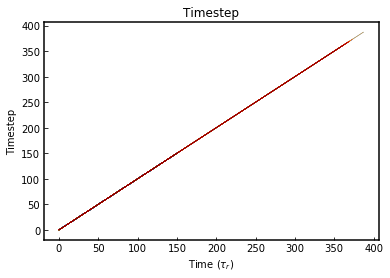

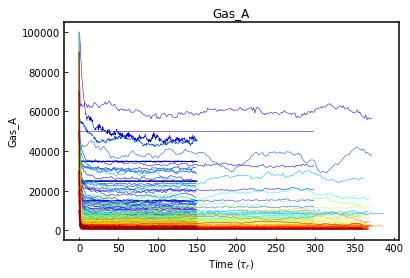

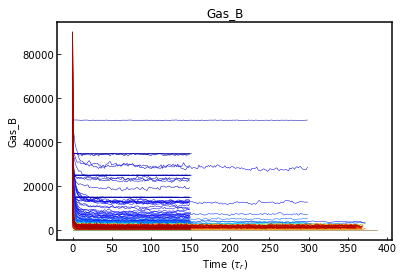

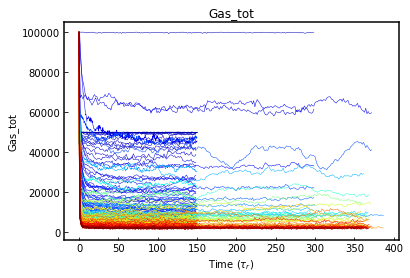

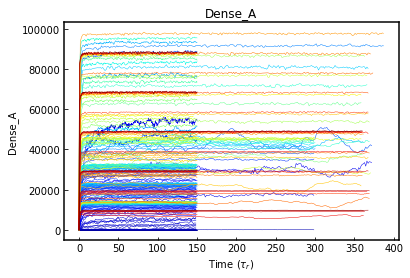

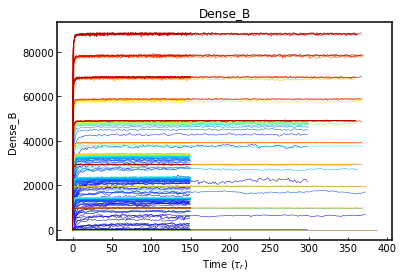

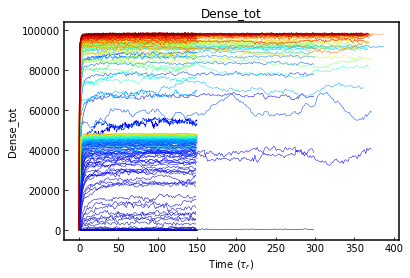

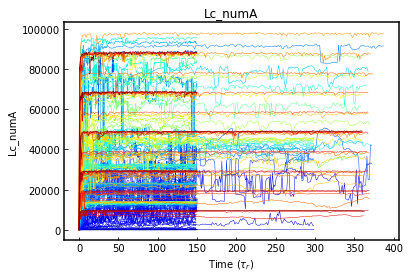

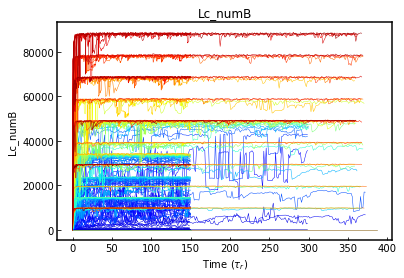

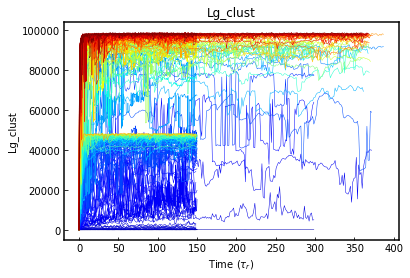

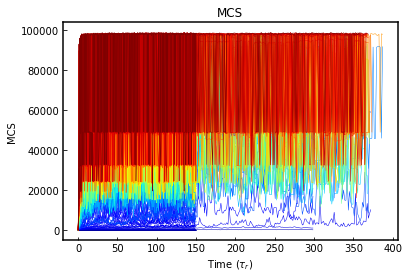

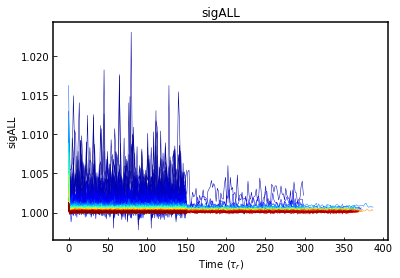

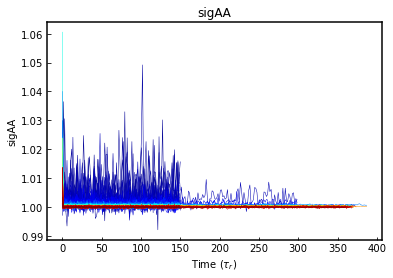

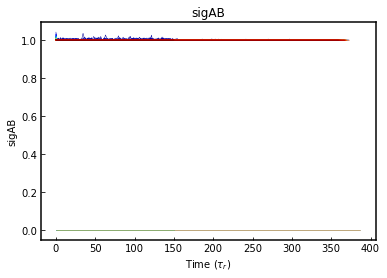

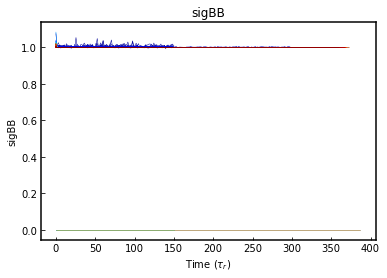

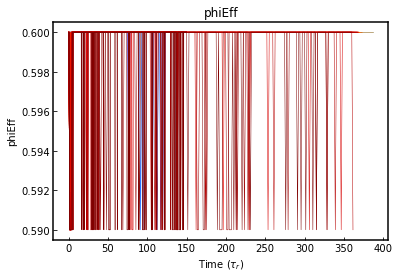

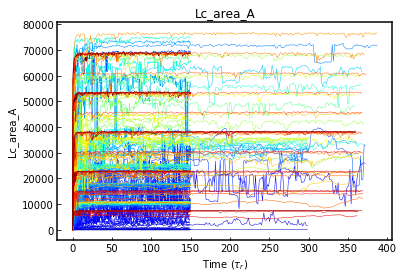

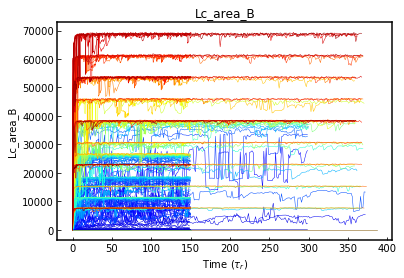

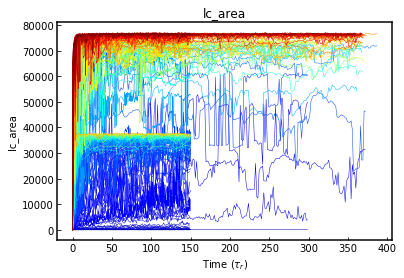

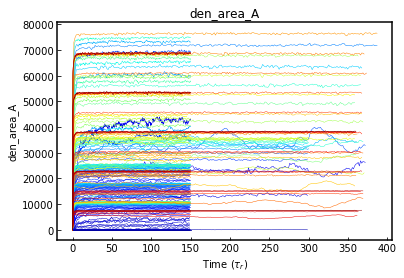

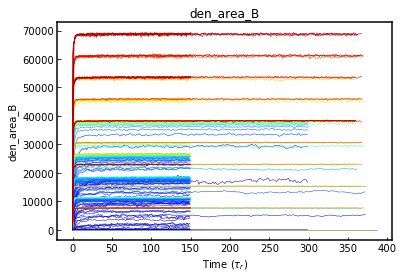

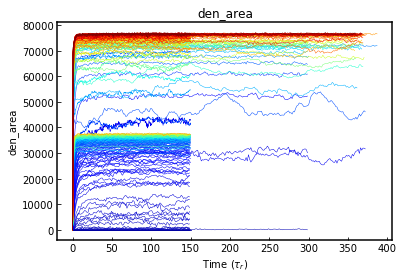

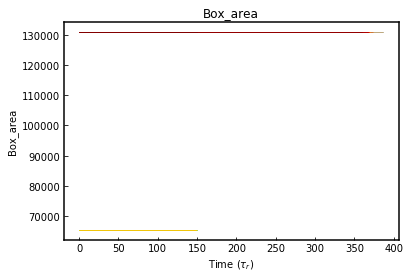

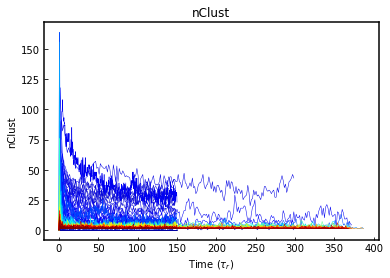

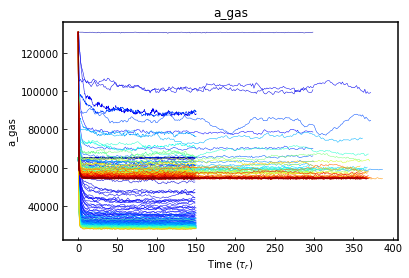

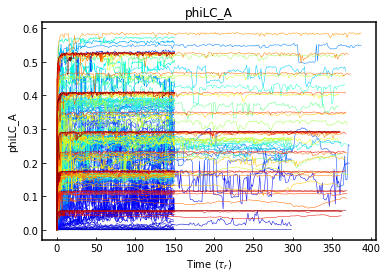

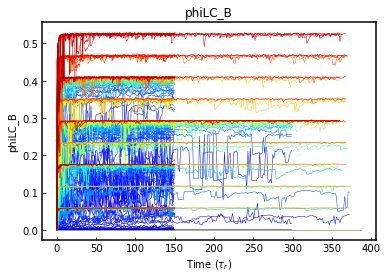

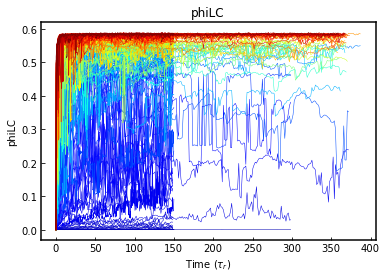

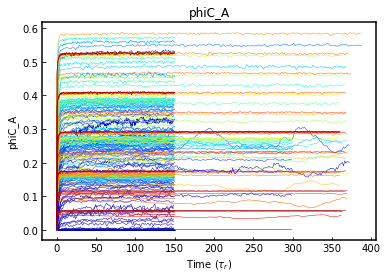

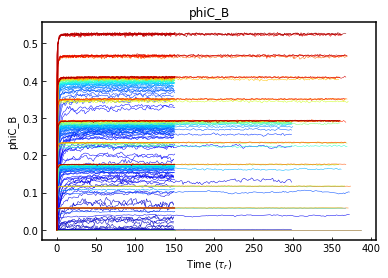

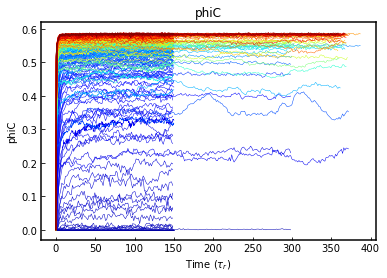

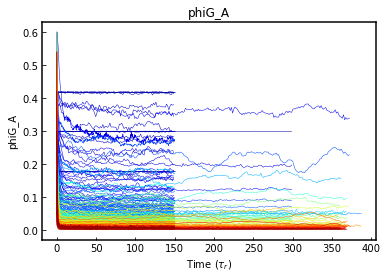

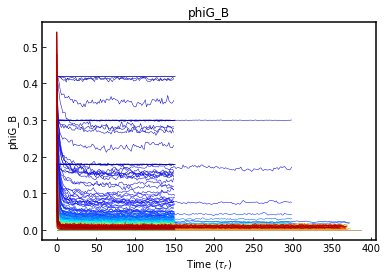

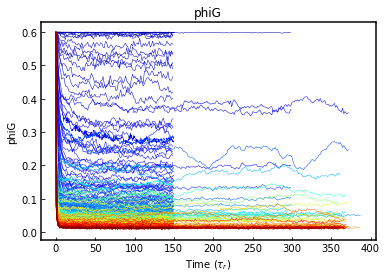

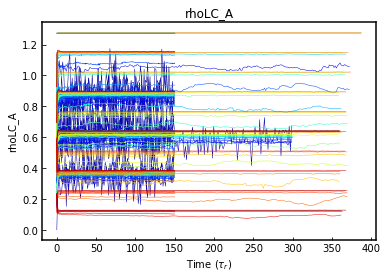

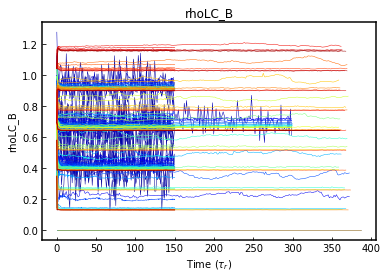

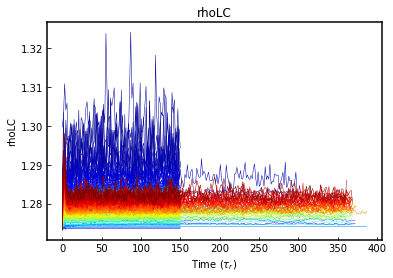

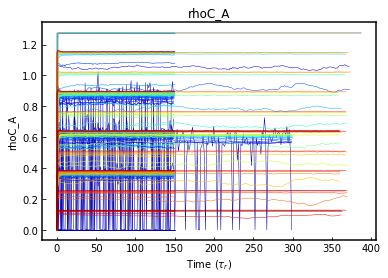

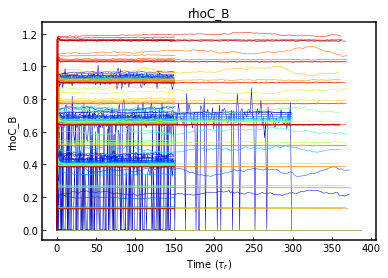

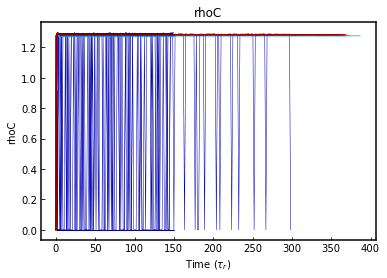

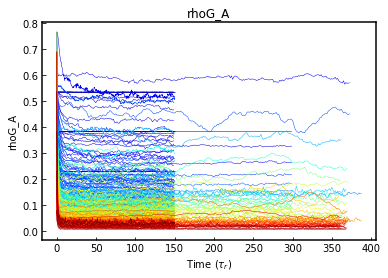

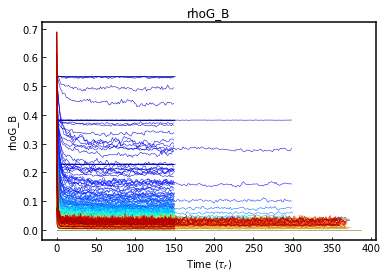

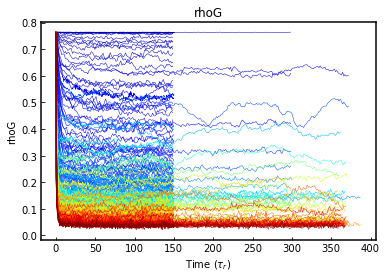

In [7]:
# %%capture
# Plot each column vs time for all files
for z in list(all_data[0]):
    for i in xrange(len(all_data)):
        plt.plot(all_data[i]['Timestep'], all_data[i][z], c=plt.cm.jet(params['peNet'][i] / max(params['peNet'])), label=(params['pe'][i]))
    plt.xlabel(r'Time $(\tau_{r})$')
    plt.ylabel(z)
    plt.title(z)
#     plt.legend()
    plt.show()

In [8]:
# Let's compute a moving average of the data
winSz = 10
perc = 0.05
ssIndex = [[] for x in all_data]
headers = list(all_data[0])
headers.remove('Timestep')
headers.remove('Box_area')
ssAvg = pd.DataFrame(columns=headers)

# Get the index at which each data set is at steady-state
for i in xrange(len(all_data)):
    # List to store the steady-state column averages
    ssMean = []
    
    for j in headers:
        # Get the final window average
        match = np.mean(all_data[i][j][-winSz:-1])
        # Compute the moving average for the column
        movAvg = all_data[i][j].rolling(window=winSz).mean()
        # Threshold number of indices which must be in agreement
        thresh = 0
        count = 0
        setFlag = 0
        
        # Get the index that steady-state begins
        for k in xrange(len(movAvg)):
            # If the moving average is within 5% of the final average...
            if ((1. - perc) * match) <= movAvg[k] <= ((1. + perc) * match):
                count += 1
                if count > thresh:
                    # Store the index
                    ssIndex[i].append(k)
                    # Compute the steady-state average
                    ssMean.append(np.mean(all_data[i][j][k:-1]))
                    # Flag to show data was set
                    setFlag = 1
                    break
            # Not within margin, reset the consecutive count
            else:
                count = 0
        if setFlag != 1:
            ssMean.append(None)           
    # Append list of steady-state averages to dataframe
    ss_df = pd.DataFrame([ssMean], columns=headers)
    ssAvg = ssAvg.append(ss_df, ignore_index=True)

# Normalize by number of particles 
ssAvg['Gas_tot'] /= params['partAll'] / 100.
ssAvg['Dense_tot'] /= params['partAll'] / 100.
ssAvg['Lg_clust'] /= params['partAll'] / 100.
ssAvg['MCS'] /= params['partAll'] / 100.
ssAvg['nClust'] /= params['partAll'] / 100.

for i in xrange(len(all_data)):
    # For type-A particles
    if params['partA'][i] != 0:
        ssAvg.loc[i, 'Gas_A'] /= params['partA'][i] / 100.
        ssAvg.loc[i, 'Dense_A'] /= params['partA'][i] / 100.
        ssAvg.loc[i, 'Lc_numA'] /= params['partA'][i] / 100.

    # For type-B particles
    if params['partB'][i] != 0:
        ssAvg.loc[i, 'Gas_B'] /= params['partB'][i] / 100.
        ssAvg.loc[i, 'Dense_B'] /= params['partB'][i] / 100.
        ssAvg.loc[i, 'Lc_numB'] /= params['partB'][i] / 100.

# # Now let's check and see how we did with our averaging
# for i in xrange(len(all_data)):
#     # This is just to limit the output
#     if params['peA'][i] == 250:
#         count = 0
#         for j in headers:
#             # Plot the raw data
#             plt.plot(all_data[i]['Timestep'], all_data[i][j])
#             # Overlay the range we compute the steady-state average
#             plt.plot(all_data[i]['Timestep'][ssIndex[i][count]:-1], all_data[i][j][ssIndex[i][count]:-1], c='k')
#             count += 1
#         plt.ylim(0)
#         plt.show()
        
# print(ssIndex)
# print(ssMean)
display(ssAvg)

Gas_A       Gas_B  Gas_tot    Dense_A    Dense_B Dense_tot  \
0    100.000000  100.000000      100   0.000000   0.000000         0   
1    100.000000  100.000000      100   0.000000   0.000000         0   
2    100.000000  100.000000      100   0.000000   0.000000         0   
3    100.000000  100.000000      100   0.000000   0.000000         0   
4    100.000000  100.000000      100   0.000000   0.000000         0   
..          ...         ...      ...        ...        ...       ...   
235    2.059862    1.842449  1.90744  97.867497  98.086988   98.0211   
236    2.733077    2.055601  2.12311  97.257021  97.937130   97.8691   
237    1.910096    1.864426  1.90553  98.021025  98.053367   98.0243   
238    1.949719    1.952090   1.9509  98.030443  98.027452   98.0289   
239    2.022037    2.020713  2.02164  97.952612  97.954456   97.9532   

       Lc_numA    Lc_numB   Lg_clust      MCS    sigALL     sigAA     sigAB  \
0     0.053271   0.051600  0.0524045        0  1.004681  1.005914  1.004937   
1     0.050794   0.050543  0.0501818        0  1.003852  1.006393  1.004502   
2     0.050831   0.052360  0.0515955        0  1.003490  1.006036  1.004564   
3     0.055025   0.059821  0.0583056        0  1.004010  1.006150  1.004226   
4     0.058874   0.063248  0.0593898        0  1.004225  1.005169  1.005005   
..         ...        ...        ...      ...       ...       ...       ...   
235  97.793989  98.013198    97.9474  88.6471  1.000085  1.000083  1.000075   
236  97.133617  97.813470    97.7455  88.1143  1.000069  1.000076  1.000067   
237  97.755456  97.779653    97.7579  89.2901  1.000063  1.000061  1.000060   
238  97.849965  97.842087     97.846   91.437  1.000056  1.000042  1.000053   
239  97.747677  97.746708    97.7474  87.0789  1.000064  1.000068  1.000059   

        sigBB    phiEff     Lc_area_A     Lc_area_B       lc_area  \
0    1.007707  0.600000     10.243953      9.914791     20.147639   
1    1.007463  0.600000     13.729570      5.857881     19.380644   
2    1.005817  0.600000      9.809441     10.113473     19.942544   
3    1.004083  0.600000      6.377899     16.168399     22.517038   
4    1.004893  0.600000     15.986818      7.356783     23.577771   
..        ...       ...           ...           ...           ...   
235  1.000082  0.599593  22884.922002  53513.992030  76398.914029   
236  1.000068  0.599068   7575.848106  68647.979933  76223.828046   
237  1.000023  0.598615  68586.287063   7622.477631  76208.764693   
238  1.000058  0.598874  38139.357190  38136.214483  76275.571676   
239  1.000054  0.598798  53353.303359  22865.501267  76218.804629   

       den_area_A    den_area_B      den_area      nClust         a_gas  \
0        0.000000      0.000000      0.000000           0  65449.850000   
1        0.000000      0.000000      0.000000           0  65449.850000   
2        0.000000      0.000000      0.000000           0  65449.850000   
3        0.000000      0.000000      0.000000           0  65449.850000   
4        0.000000      0.000000      0.000000           0  65449.850000   
..            ...           ...           ...         ...           ...   
235  22901.884315  53550.857660  76451.524453  0.00121397  54437.491822   
236   7585.518283  68735.165620  76320.683909  0.00120259  54579.016091   
237  68771.102807   7643.686568  76414.789372  0.00120165  54479.659506   
238  38210.033864  38208.800902  76418.834770  0.00114493  54480.865230   
239  53454.696993  22909.900341  76364.597336   0.0012534  54526.994765   

      phiLC_A   phiLC_B     phiLC    phiC_A    phiC_B      phiC    phiG_A  \
0    0.000157  0.000151  0.000308  0.000000  0.000000  0.000000  0.300000   
1    0.000210  0.000090  0.000296  0.000000  0.000000  0.000000  0.420000   
2    0.000150  0.000155  0.000305  0.000000  0.000000  0.000000  0.300000   
3    0.000097  0.000247  0.000344  0.000000  0.000000  0.000000  0.180000   
4    0.000244  0.000112  0.000360  0.000000  0.000000  0.000000  0.420000   
..  

Totals


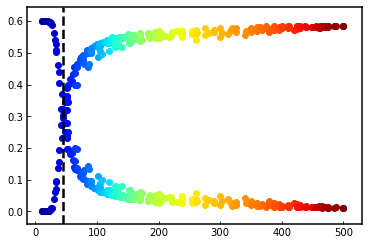

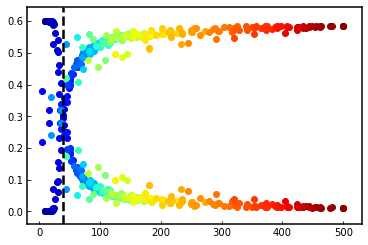

Critical net activity: 45.1
Critical ratio-weighted net activity: 39.9764357695


In [9]:
# Let's try and plot phiG and phiC vs peNet
print("Totals")
# flag = 0
# for i in xrange(len(all_data)):
#     if params['peR'][i] > 0.1:
#         plt.scatter(params['peNet'][i], ssAvg['phiG'][i], c=plt.cm.jet(params['peR'][i]))
#         plt.scatter(params['peNet'][i], ssAvg['phiC'][i], c=plt.cm.jet(params['peR'][i]))
#     if ssAvg['phiG'][i] <= ssAvg['phiC'][i] and flag == 0:
#         peNCrit = params['peNet'][i]
#         flag = 1
# plt.show()

# flag = 0
# for i in xrange(len(all_data)):
#     if params['peR'][i] > 0.1:
#         plt.scatter(params['peRNet'][i], ssAvg['phiG'][i], c=plt.cm.jet(params['peR'][i]))
#         plt.scatter(params['peRNet'][i], ssAvg['phiC'][i], c=plt.cm.jet(params['peR'][i]))
#     if ssAvg['phiG'][i] <= ssAvg['phiC'][i] and flag == 0:
#         peNRCrit = params['peRNet'][i]
#         flag = 1
# plt.show()

flag = 0
for i in xrange(len(all_data)):
    if params['peR'][i] > 0.1:
        plt.scatter(params['peNet'][i], ssAvg['phiG'][i], c=plt.cm.jet(float(i)/len(all_data)))
        plt.scatter(params['peNet'][i], ssAvg['phiC'][i], c=plt.cm.jet(float(i)/len(all_data)))
    if ssAvg['phiG'][i] <= ssAvg['phiC'][i] and flag == 0:
        peNCrit = params['peNet'][i]
        flag = 1
plt.axvline(x=peNCrit, ls='--', lw=2.5, c='k')
plt.show()

flag = 0
for i in xrange(len(all_data)):
    if params['peR'][i] > -0.1:
        plt.scatter(params['peRNet'][i], ssAvg['phiG'][i], c=plt.cm.jet(float(i)/len(all_data)))
        plt.scatter(params['peRNet'][i], ssAvg['phiC'][i], c=plt.cm.jet(float(i)/len(all_data)))
    if ssAvg['phiG'][i] <= ssAvg['phiC'][i] and flag == 0:
        peNRCrit = params['peRNet'][i]
        flag = 1
plt.axvline(x=peNRCrit, ls='--', lw=2.5, c='k')
plt.show()

print("Critical net activity: {}").format(peNCrit)
print("Critical ratio-weighted net activity: {}").format(peNRCrit)

# print("A particles")
# for i in xrange(len(all_data)):
#     if params['peR'][i] > 0.1:
#         plt.scatter(params['peNet'][i], ssAvg['phiG_A'][i], c=plt.cm.jet(params['peR'][i]))
#         plt.scatter(params['peNet'][i], ssAvg['phiC_A'][i], c=plt.cm.jet(params['peR'][i]))
# plt.show()

# print("B particles")
# for i in xrange(len(all_data)):
#     if params['peR'][i] > 0.1:
#         plt.scatter(params['peNet'][i], ssAvg['phiG_B'][i], c=plt.cm.jet(params['peR'][i]))
#         plt.scatter(params['peNet'][i], ssAvg['phiC_B'][i], c=plt.cm.jet(params['peR'][i]))
# plt.show()



0.9497153456830821
0.7275648983950616
0.04785257173986678


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


(-3, 0)

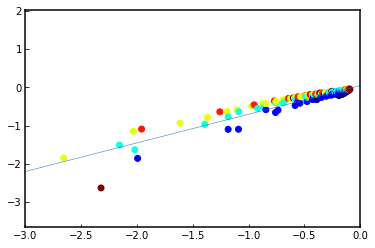

In [10]:
# Let's grab a fit for the loglog m vs fractional inverse pe plot
def plotLine(x, m, b):
    return (m*x) + b

def plotPow(x, m, b):
    return (x**m)*(np.exp(b))

def getRSquared(xdat, ydat, m, b):
    # Compute the average y value
    avg = np.mean(ydat)
    real = 0.0
    pred = 0.0
    # Get the distance from real and predicted values to mean
    for i in xrange(len(ydat)):
        real += (ydat[i] - avg)**2
        pred += (plotLine(xdat[i], m, b) - avg)**2
    return pred / real

peNCritInv = 1. / peNCrit
logtau = []
logm = []
pers = []
for i in xrange(len(all_data)):
    if params['peR'][i] > 0.1:
        x = np.log(-1.*(1./params['peNet'][i] - peNCritInv)/peNCritInv)
        y = np.log((ssAvg['phiC'][i] - ssAvg['phiG'][i])/0.6)
        if not np.isnan(x) and not np.isnan(y):
            if not np.isinf(x) and not np.isinf(y):
                if not np.isinf(-x) and not np.isinf(-y):
                    logtau.append(x)
                    logm.append(y)
                    pers.append(params['peR'][i])

rangeDat = np.arange(np.log(10**-2), np.log(10.), 0.001)        
m, b = np.polyfit(logtau, logm, 1)
res = getRSquared(logtau, logm, 3./4., b)
print(res)
print(m)
print(b)
plt.plot(rangeDat, plotLine(rangeDat, 3./4., b))
plt.scatter(logtau, logm, c=pers, cmap=mpl.cm.jet)
plt.xlim(-3, 0)



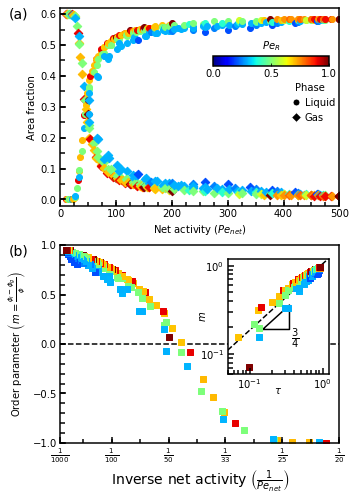

In [11]:
# Make a nicer looking figure for the binodal
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.lines import Line2D

fig, ax = plt.subplots(2, 1, figsize=(5, 8))
for i in xrange(len(all_data)):
    if params['peR'][i] > 0.1:
#     if params['peR'][i] > 0.1 and params['peNet'][i] >= peNCrit:
        ax[0].scatter(params['peNet'][i], ssAvg['phiG'][i], c=plt.cm.jet(params['peR'][i]), marker='D')
        ax[0].scatter(params['peNet'][i], ssAvg['phiC'][i], c=plt.cm.jet(params['peR'][i]), marker='o')

ax[0].set_xlabel(r'Net activity $(Pe_{net})$')
ax[0].set_ylabel(r'Area fraction')
ax[0].set_xlim(0, 500)
ax[0].set_ylim(-0.02, 0.62)

# Set tick dims
ax[0].xaxis.set_major_locator(MultipleLocator(100))
ax[0].xaxis.set_minor_locator(MultipleLocator(25))
ax[0].yaxis.set_major_locator(MultipleLocator(0.1))
ax[0].yaxis.set_minor_locator(MultipleLocator(0.05))
ax[0].tick_params(which='major', length=6, width = 1.5)
ax[0].tick_params(which='minor', length=4.5, width = 1.5)

# Make a shape legend
leg = [Line2D([0], [0], marker='o', color='w', linestyle='', label='Liquid', markerfacecolor='k', markersize=7),
       Line2D([0], [0], marker='D', color='w', linestyle='', label='Gas', markerfacecolor='k', markersize=7)]
ax[0].legend(handles=leg, loc = 2, title=r'Phase',
          bbox_to_anchor=(0.775, 0.67), bbox_transform=ax[0].transAxes,
          frameon=False,
          handletextpad=-0.1)

# Make a colorbar (left, bottom, width, height)
ax2 = fig.add_axes([0.55, 0.78, 0.32, 0.0175])
cmap = mpl.cm.jet
norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=mpl.cm.jet,
                                norm=norm,
                                orientation='horizontal',
                               ticks=[0.0, 0.5, 1.0])
cb1.set_label(r'$Pe_{R}$', labelpad=-40, rotation=0)

# Plot the order parameter here
for i in xrange(len(all_data)):
    if params['peR'][i] > 0.1:
        ax[1].scatter((1./params['peNet'][i]), (ssAvg['phiC'][i] - ssAvg['phiG'][i])/0.6, 
                      c=plt.cm.jet(params['peR'][i]), marker='s')
ax[1].set_xlabel(r'Inverse net activity $\left(\frac{1}{Pe_{net}}\right)$', fontsize=14)
ax[1].set_ylabel(r'Order parameter $\left(m=\frac{\phi_{l}-\phi_{g}}{\phi}\right)$')
ax[1].set_xlim(1./1000., 0.05)
ax[1].set_ylim(-1., 1.)
ax[1].xaxis.set_ticks([1./1000., 10./1000., 20./1000., 30./1000., 40./1000., 50./1000.])
ax[1].set_xticklabels([r'$\frac{1}{1000}$',
                       r'$\frac{1}{100}$',
                       r'$\frac{1}{50}$',
                       r'$\frac{1}{33}$',
                       r'$\frac{1}{25}$',
                       r'$\frac{1}{20}$'])

# Set tick dims
# ax[1].xaxis.set_major_locator(MultipleLocator(100))
ax[1].xaxis.set_minor_locator(MultipleLocator(0.005))
ax[1].yaxis.set_major_locator(MultipleLocator(0.5))
ax[1].yaxis.set_minor_locator(MultipleLocator(0.1))
ax[1].tick_params(which='major', length=6, width = 1.5)
ax[1].tick_params(which='minor', length=4.5, width = 1.5)
# Horizontal line at m=0
ax[1].axhline(y=0, lw=1.5, ls='--', c='k', zorder=0)

# Inset to bottom plot
left, bottom, width, height = [0.59, 0.245, 0.28, 0.20]
ax3 = fig.add_axes([left, bottom, width, height])
peNCritInv = 1. / peNCrit
for i in xrange(len(all_data)):
    if params['peR'][i] > 0.1:
        ax3.scatter( ((1./params['peNet'][i] - peNCritInv)/peNCritInv)*-1 , (ssAvg['phiC'][i] - ssAvg['phiG'][i])/0.6, 
                    c=plt.cm.jet(params['peR'][i]), marker='s')

expRange = np.arange(0.0001, 10., 0.0001)  
ax3.plot(expRange, plotPow(expRange, 3./4., b), lw=1.5, ls='--', c='k', zorder=0)
ax3.text(0.67, 0.31, r'$\frac{3}{4}$', 
         horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes,
         fontsize=14)
# Plot triangle for slope
leftx = 0.15
rightx = 0.35
boty = plotPow(leftx, 3./4., (b*-5.))
topy = plotPow(rightx, 3./4., (b*-5.))
plt.plot([leftx, rightx, rightx, leftx], [boty, topy, boty, boty], zorder=0, c='k', ls='-', lw=1.5)

# Limits, labels, ticks
ax3.set_xlim(0.05, 1.2)
ax3.set_ylim(0.06, 1.2)
# ax3.set_xlabel(r'$\frac{-\left(Pe_{net}^{-1}-Pe_{net,c}^{-1}\right)}{Pe_{net,c}^{-1}}$')
ax3.set_xlabel(r'$\tau$', labelpad=-5)
ax3.set_ylabel(r'$m$', labelpad=-8)
ax3.loglog()
ax3.tick_params(which='major', length=6, width = 1.5)
ax3.tick_params(which='minor', length=4.5, width = 1.5)

# Add letter labels to figure
ax[0].text(-0.15, 0.97, r'(a)', 
           horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes,
           fontsize=14)
ax[1].text(-0.15, 0.97, r'(b)', 
           horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes,
           fontsize=14)

plt.savefig('net_activity_binodal.pdf', dpi=1000, bbox_inches = 'tight', pad_inches = 0.01)

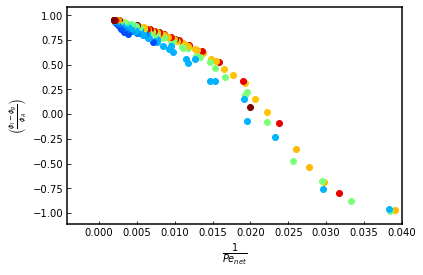

In [12]:
# Plot the order parameter here
for i in xrange(len(all_data)):
    if params['peR'][i] > 0.1:
        plt.scatter((1./params['peNet'][i]), (ssAvg['phiC'][i] - ssAvg['phiG'][i])/0.6, c=plt.cm.jet(params['peR'][i]))
plt.xlabel(r'$\frac{1}{Pe_{net}}$', fontsize=14)
plt.ylabel(r'$\left(\frac{\phi_{l}-\phi_{g}}{\phi_{A}}\right)$')
plt.xlim(right=0.04)
plt.ylim()
plt.show()

In [13]:
# # Let's try and plot phiG and phiC vs peNet
# for i in xrange(len(all_data)):
#     plt.scatter(params['peNet'][i], ssAvg['rhoG'][i])
#     plt.scatter(params['peNet'][i], ssAvg['rhoC'][i])
# plt.show()
    
# for i in xrange(len(all_data)):
#     plt.scatter(params['peRNet'][i], ssAvg['rhoG'][i])
#     plt.scatter(params['peRNet'][i], ssAvg['rhoC'][i])
# plt.show()

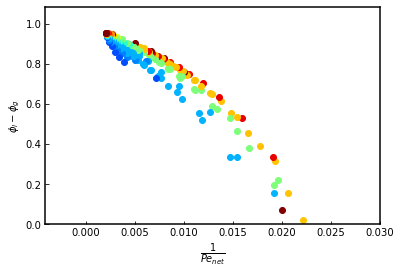

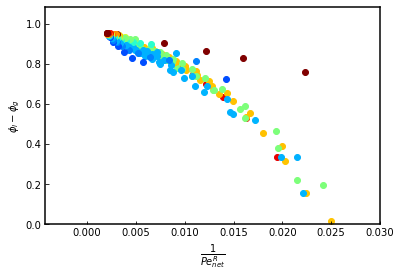

In [14]:
# Show that the order parameter goes from -1 to 1
for i in xrange(len(all_data)):
    if params['peR'][i] > 0.1:
        plt.scatter((1./params['peNet'][i]), (ssAvg['phiC'][i] - ssAvg['phiG'][i])/0.6, c=plt.cm.jet(params['peR'][i]))
plt.xlabel(r'$\frac{1}{Pe_{net}}$', fontsize=14)
plt.ylabel(r'$\phi_{l}-\phi_{g}$')
plt.xlim(right=0.03)
plt.ylim(bottom=0)
plt.show()

for i in xrange(len(all_data)):
    if params['peR'][i] > 0.1:
        plt.scatter((1./params['peRNet'][i]), (ssAvg['phiC'][i] - ssAvg['phiG'][i])/0.6, c=plt.cm.jet(params['peR'][i]))
plt.xlabel(r'$\frac{1}{Pe_{net}^{R}}$', fontsize=14)
plt.ylabel(r'$\phi_{l}-\phi_{g}$')
plt.xlim(right=0.03)
plt.ylim(bottom=0)
plt.show()

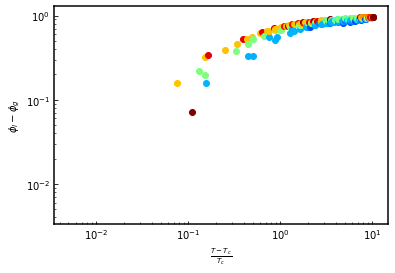

In [15]:
# Let's look at the difference in densities... just like boiling water!

# We look at the plot and say Pe_c ~ 50
# peNCrit = 50.
for i in xrange(len(all_data)):
    if params['peR'][i] > 0.1:
        plt.scatter((params['peNet'][i] - peNCrit) / peNCrit, (ssAvg['phiC'][i] / 0.6) - (ssAvg['phiG'][i] / 0.6), c=plt.cm.jet(params['peR'][i]))
plt.xlabel(r'$\frac{T-T_{c}}{T_{c}}$')
plt.ylabel(r'$\phi_{l}-\phi_{g}$')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(bottom=10**-2)
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


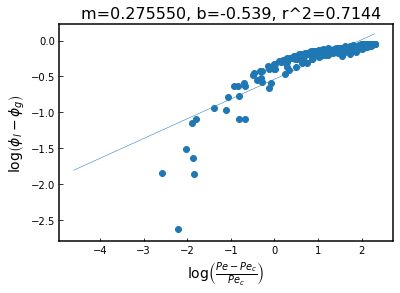

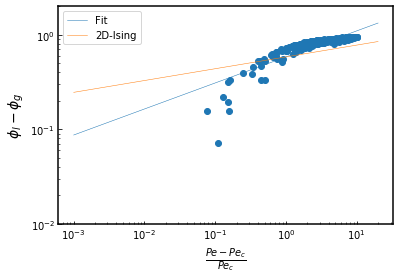

The critical exponent is m=0.275549666283


In [16]:
# Let's get a fit for this to get our critical exponent

# Function for basic line
def plotLine(x, m, b):
    return (m*x) + b

def plotPow(x, m, b):
    return (x**m)*(np.exp(b))

def getRSquared(xdat, ydat, m, b):
    # Compute the average y value
    avg = np.mean(ydat)
    real = 0.0
    pred = 0.0
    # Get the distance from real and predicted values to mean
    for i in xrange(len(ydat)):
        real += (ydat[i] - avg)**2
        pred += (plotLine(xdat[i], m, b) - avg)**2
    return pred / real

# Get the data to fit
xfit = []
yfit = []
logFracDevPe = []
logPhiDiff = []
for i in xrange(len(all_data)):
    if params['peR'][i] > 0.1:
        logx = np.log((params['peNet'][i] - peNCrit) / peNCrit)
        logy = np.log((ssAvg['phiC'][i] / 0.6) - (ssAvg['phiG'][i] / 0.6))
        if not math.isnan(logx) and not math.isnan(logy):
            if not math.isinf(logx) and not math.isinf(logy):
                xfit.append((params['peNet'][i] - peNCrit) / peNCrit)
                yfit.append((ssAvg['phiC'][i] / 0.6) - (ssAvg['phiG'][i] / 0.6))
                logFracDevPe.append(logx)
                logPhiDiff.append(logy)

rangeDat = np.arange(np.log(10**-2), np.log(10.), 0.000001)        
m, b = np.polyfit(logFracDevPe, logPhiDiff, 1)
res = getRSquared(logFracDevPe, logPhiDiff, m, b)
plt.plot(rangeDat, plotLine(rangeDat, m, b))
plt.scatter(logFracDevPe, logPhiDiff)
plt.xlabel(r'$\log\left(\frac{Pe-Pe_{c}}{Pe_{c}}\right)$', fontsize=14)
plt.ylabel(r'$\log\left(\phi_{l}-\phi_{g}\right)$', fontsize=14)
plt.text(0.0675, 1.025,'m={:.6f}, b={:.3f}, r^2={:.4f}'.format(m, b, res),
         fontsize=16, transform=plt.gca().transAxes)
plt.show()

plt.scatter(xfit, yfit)
rangeRaw = np.arange(10**-3, 20., 0.00001)
plt.plot(rangeRaw, plotPow(rangeRaw, m, b), label='Fit')
plt.plot(rangeRaw, plotPow(rangeRaw, (1./8.), b), label='2D-Ising')
plt.xlabel(r'$\frac{Pe-Pe_{c}}{Pe_{c}}$', fontsize=14)
plt.ylabel(r'$\phi_{l}-\phi_{g}$', fontsize=14)
plt.legend()
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(10**-2, 2)
plt.show()
print("The critical exponent is m={}").format(m)

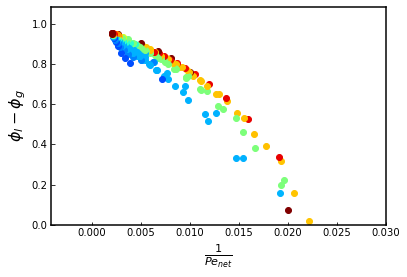

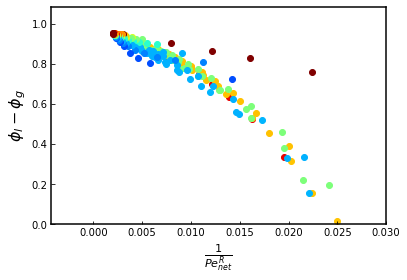

In [17]:
# Show that the order parameter goes from -1 to 1
for i in xrange(len(all_data)):
    if params['peR'][i] > 0.1:
        plt.scatter((1./params['peNet'][i]), (ssAvg['phiC'][i] - ssAvg['phiG'][i])/0.6, c=plt.cm.jet(params['peR'][i]))
plt.xlabel(r'$\frac{1}{Pe_{net}}$', fontsize=16)
plt.ylabel(r'$\phi_{l}-\phi_{g}$', fontsize=16)
plt.xlim(right=0.03)
plt.ylim(bottom=0)
plt.show()

for i in xrange(len(all_data)):
    if params['peR'][i] > 0.1:
        plt.scatter((1./params['peRNet'][i]), (ssAvg['phiC'][i] - ssAvg['phiG'][i])/0.6, c=plt.cm.jet(params['peR'][i]))
plt.xlabel(r'$\frac{1}{Pe_{net}^{R}}$', fontsize=16)
plt.ylabel(r'$\phi_{l}-\phi_{g}$', fontsize=16)
plt.xlim(right=0.03)
plt.ylim(bottom=0)
plt.show()

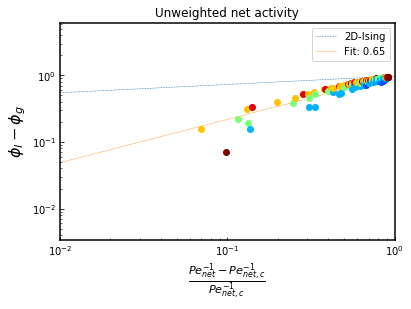

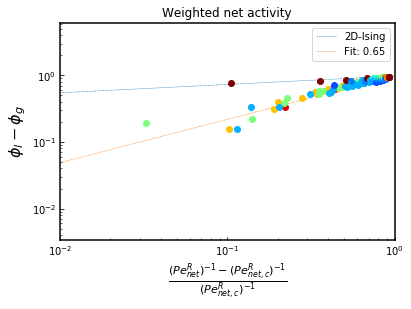

In [18]:
# Take a look at inverse activity
invNetPe = []
invNetPeR = []
diffDenseNorm = []
for i in xrange(len(all_data)):
    invNetPe.append(1. / params['peNet'][i])
    invNetPeR.append(1. / params['peRNet'][i])
    diffDenseNorm.append((ssAvg['phiC'][i] - ssAvg['phiG'][i]) / 0.6)
rangeRaw = np.arange(10**-2, 10., 0.00001)

# We look at the plot and say Pe_c ~ 50
peNCritInv = 1. / peNCrit
# peNCritInv = 0.02
fitExp = 1. / 3.
fitExp = .65
plt.plot(rangeRaw, plotPow(rangeRaw, (1./8.), b/20), label='2D-Ising', zorder=0, ls='--')
plt.plot(rangeRaw, plotPow(rangeRaw, (fitExp), b/20), label='Fit: {0:.2f}'.format(fitExp), zorder=0, ls='--') 
for i in xrange(len(all_data)):
    if params['peR'][i] > 0.1:
        plt.scatter( -((invNetPe[i] - peNCritInv) / peNCritInv), diffDenseNorm[i], c=plt.cm.jet(params['peR'][i]))

plt.xlabel(r'$\frac{Pe_{net}^{-1}-Pe_{net,c}^{-1}}{Pe_{net,c}^{-1}}$', fontsize=16)
plt.ylabel(r'$\phi_{l}-\phi_{g}$', fontsize=16)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**-2, 1.)
plt.title('Unweighted net activity')
plt.legend()
plt.show()

# We look at the plot and say Pe_c ~ 50
peNRCritInv = 1. / peNRCrit
# peNRCritInv = 0.02
plt.plot(rangeRaw, plotPow(rangeRaw, (1./8.), b/20), label='2D-Ising', zorder=0, ls='--')
plt.plot(rangeRaw, plotPow(rangeRaw, (fitExp), b/20), label='Fit: {0:.2f}'.format(fitExp), zorder=0, ls='--') 
for i in xrange(len(all_data)):
    if params['peR'][i] > 0.1:
        plt.scatter( -((invNetPeR[i] - peNRCritInv) / peNRCritInv), diffDenseNorm[i], c=plt.cm.jet(params['peR'][i]))

plt.xlabel(r'$\frac{(Pe_{net}^{R})^{-1}-(Pe_{net,c}^{R})^{-1}}{(Pe_{net,c}^{R})^{-1}}$', fontsize=16)
plt.ylabel(r'$\phi_{l}-\phi_{g}$', fontsize=16)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**-2,1.)
plt.title('Weighted net activity')
plt.legend()
plt.show()